In [39]:
import pandas as pd 
import seaborn as sns
sns.set_palette('Set2')
sns.set_style('whitegrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import joblib
import numpy as np

In [2]:
train = pd.read_csv('trainv1.feather')
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [3]:
train['date'] = pd.to_datetime(train['date'])
train['dayweek'] = train['date'].dt.day_of_week
train['daymonth'] = train['date'].dt.day
train.rename(columns={'store_nbr':'store'}, inplace=True)
train

,id,date,store,family,sales,onpromotion,dayweek,daymonth
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,1,1
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,1,15
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,1,15
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,1,15
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,15


In [4]:
sub = train.query('date > "2017-02" and store == 46 and family == "PRODUCE"')
sub

,id,date,store,family,sales,onpromotion,dayweek,daymonth
2654748,2654748,2017-02-02,46,PRODUCE,2371.677,4,3,2
2656530,2656530,2017-02-03,46,PRODUCE,2921.083,4,4,3
2658312,2658312,2017-02-04,46,PRODUCE,4783.769,4,5,4
2660094,2660094,2017-02-05,46,PRODUCE,5278.507,4,6,5
2661876,2661876,2017-02-06,46,PRODUCE,2756.716,4,0,6
...,...,...,...,...,...,...,...,...
2993328,2993328,2017-08-11,46,PRODUCE,3204.442,10,4,11
2995110,2995110,2017-08-12,46,PRODUCE,3006.773,9,5,12
2996892,2996892,2017-08-13,46,PRODUCE,3519.123,9,6,13
2998674,2998674,2017-08-14,46,PRODUCE,2745.622,10,0,14


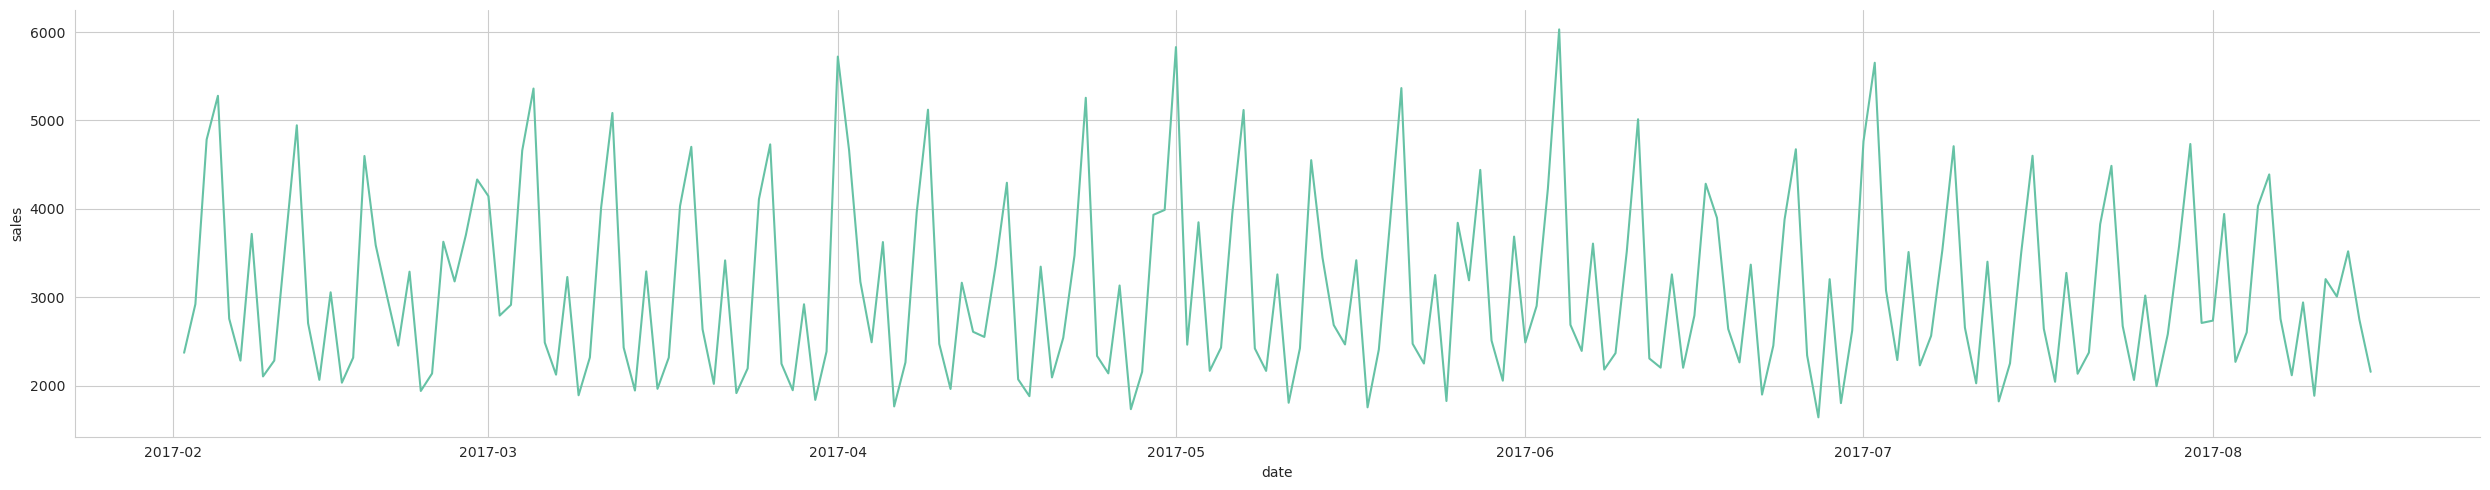

In [5]:
sns.relplot(data=sub, kind='line', x='date', y='sales', height=5, aspect=5)
# sales has clear seasonality

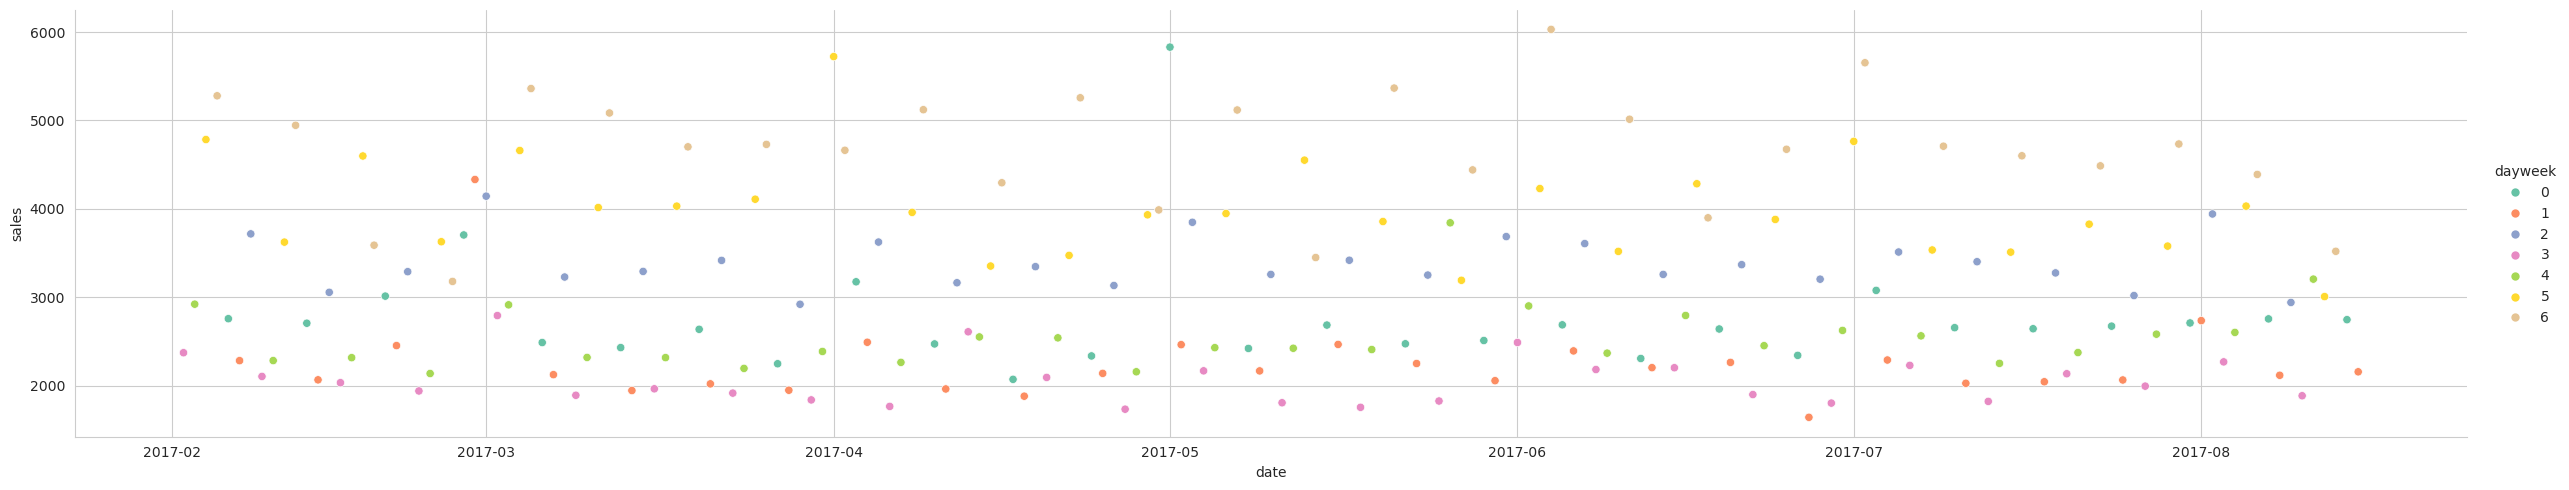

In [6]:
sns.relplot(data=sub, kind='scatter', x='date', y='sales',hue='dayweek', height=5, aspect=5, palette='Set2')
# we can see that sales are higher on Saturday and Sunday

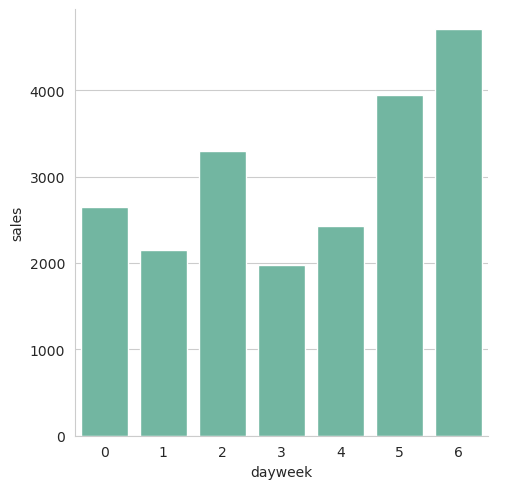

In [7]:
median_sales = sub.groupby('dayweek')['sales'].median()
median_sales = median_sales.reset_index()
sns.catplot(data=median_sales, kind='bar', x='dayweek', y='sales')

In [8]:
dm = sub.groupby('daymonth')['sales'].median()
dm = dm.reset_index()
dm.head()

,daymonth,sales
0,1,4453.0685
1,2,2900.8630
2,3,3076.8570
3,4,2601.3910
4,5,3623.7280


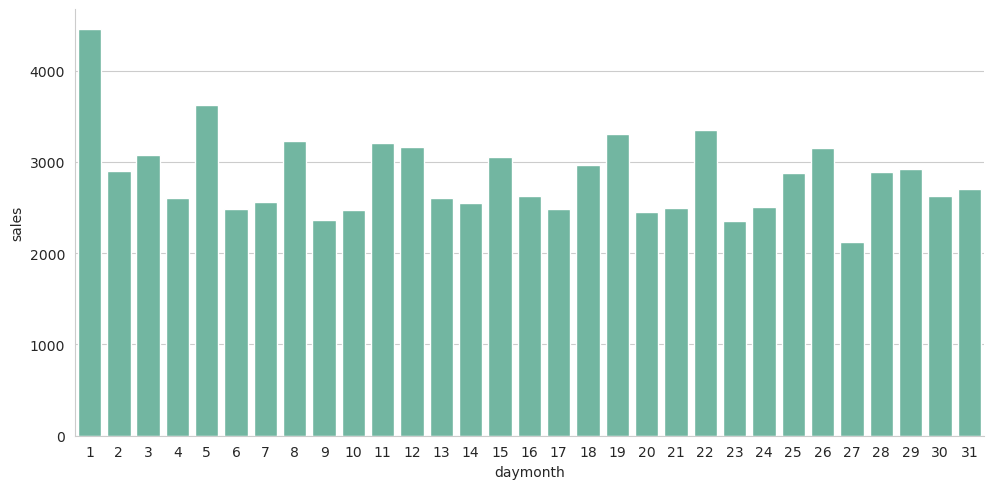

In [9]:
sns.catplot(data=dm, kind='bar', x='daymonth', y='sales', height=5, aspect=2)
# higher on 1st of each month

In [12]:
family_encoder = LabelEncoder()
train['family'] = family_encoder.fit_transform(train['family'])
train

,id,date,store,family,sales,onpromotion,dayweek,daymonth
0,0,2013-01-01,1,0,0.000,0,1,1
1,1,2013-01-01,1,1,0.000,0,1,1
2,2,2013-01-01,1,2,0.000,0,1,1
3,3,2013-01-01,1,3,0.000,0,1,1
4,4,2013-01-01,1,4,0.000,0,1,1
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,28,438.133,0,1,15
3000884,3000884,2017-08-15,9,29,154.553,1,1,15
3000885,3000885,2017-08-15,9,30,2419.729,148,1,15
3000886,3000886,2017-08-15,9,31,121.000,8,1,15


In [15]:
joblib.dump(family_encoder, 'family_encoder.pkl')

['family_encoder.pkl']

In [19]:
past6mon = train.query('date > "2017-01"')

In [22]:
X = past6mon.drop(columns=['id', 'date', 'sales', 'onpromotion'])
y = past6mon[['sales']]
X

,store,family,dayweek,daymonth
2598156,1,0,0,2
2598157,1,1,0,2
2598158,1,2,0,2
2598159,1,3,0,2
2598160,1,4,0,2
...,...,...,...,...
3000883,9,28,1,15
3000884,9,29,1,15
3000885,9,30,1,15
3000886,9,31,1,15


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
print('train acc = ', cart.score(X_train, y_train))
print('test acc = ', cart.score(X_test, y_test))

train acc =  0.992965562126929
test acc =  0.914416728977075


In [36]:
preds = cart.predict(X_test)
preds

array([7153.   , 4255.   ,   35.   , ...,  198.885,    0.   , 1802.5  ])

In [40]:
np.sqrt(mean_squared_log_error(preds, y_test))

0.8216891574652375

In [56]:
test = pd.read_csv('test.csv')
ids = test['id']
test['family'] = family_encoder.transform(test['family'])
test['date'] = pd.to_datetime(test['date'])
test['dayweek'] = test['date'].dt.day_of_week
test['daymonth'] = test['date'].dt.day
test.rename(columns={'store_nbr':'store'}, inplace=True)
test.drop(columns=['date', 'id', 'onpromotion'], inplace=True)
test

,store,family,dayweek,daymonth
0,1,0,2,16
1,1,1,2,16
2,1,2,2,16
3,1,3,2,16
4,1,4,2,16
...,...,...,...,...
28507,9,28,3,31
28508,9,29,3,31
28509,9,30,3,31
28510,9,31,3,31


In [57]:
test_preds = cart.predict(test)
test_preds

array([   2.   ,    0.   ,    5.   , ..., 1180.291,    2.   ,   28.024])

In [61]:
final_predictions = pd.DataFrame({'sales':test_preds})
final_predictions['id'] = ids
final_predictions = final_predictions[['id', 'sales']]
final_predictions

,id,sales
0,3000888,2.000
1,3000889,0.000
2,3000890,5.000
3,3000891,2374.000
4,3000892,0.000
...,...,...
28507,3029395,285.335
28508,3029396,121.961
28509,3029397,1180.291
28510,3029398,2.000


In [62]:
final_predictions.to_csv('submissionv1.csv', index=False)